
\begin{gather*}
{\displaystyle Logistic\ Regression}\\
\\
{\displaystyle --\ Giả\ sử\ xác\ suất\ một\ tập\ hợp\ features\ thuộc\ vào\ phân\ lớp\ 1,\ gọi\ là\ p}\\
{\displaystyle P( y\ =\ 1\ |\ w,\ x) \ =\ p\ \ \ \ \ \ \ \ }\\
{\displaystyle P( y\ =\ 0\ |\ w,\ x) \ =\ 1\ -\ p}\\
P( y\ |\ p) \ =\ p^{y} \ *\ ( 1-p)^{1-y} \ \ \\
( Phân\ phối\ Bernoulli)\\
\\
\rightarrow \ Xác\ suất\ tổng\ quát\ trên\ một\ tập\ dữ\ liệu\ là:\\
P( y\ |\ p) \ =\ \coprod _{i=1}^{n} p_{i} \ ^{y_{i}} \ *\ ( 1-p_{i})^{1-y_{i}}\\
\\
\rightarrow \ Mục\ tiêu\ là\ tìm\ w\ sao\ cho\ xác\ suất\ trên\ đạt\ maximum\ hay\ hàm\ số\ sau\ đạt\ cực\ tiểu:\\
Loss( p,\ y) \ =\ -log\ ( P( y\ |\ p)) \ =\ -\sum _{i=1}^{n} y_{i} \ *\ log( p_{i}) \ +\ ( 1-y_{i}) \ *\ log( 1\ -\ p_{i})\\
\\
\\
Optimizer:\ Using\ Stochastic\ Gradient\ Descent\\
\\
\frac{\partial Loss_{i}}{\partial w} =-\frac{y_{i}}{p_{i}} \ *\ \frac{\partial p_{i}}{\partial w} \ \ +\frac{1-y_{i}}{1-p_{i}} \ *\ \frac{\partial p_{i}}{\partial w} \ \ =\frac{\partial p_{i}}{\partial w} \ *\ \left(\frac{1-y_{i}}{1-p_{i}} -\frac{y_{i}}{p_{i}}\right) =\frac{\partial p_{i}}{\partial w} \ *\ \frac{p_{i} -y_{i}}{p_{i} \ *\ ( 1-p_{i})} \ ( *)\\
\\
\Longrightarrow \ Giả\ sử\ p_{i} =f\left( w^{T} x\right)\\
Đặt\ s=w^{T} x\ \Longrightarrow \ p_{i} \ =\ f( s)\\
\\
\frac{\partial p_{i}}{\partial w} =\frac{\partial p_{i}}{\partial s} \ *\ \frac{\partial s}{\partial w} =\frac{\partial p_{i}}{\partial s} \ *\ x\\
\\
\Longrightarrow \ \ tìm\ \frac{\partial p_{i}}{\partial s} \ mà\ khi\ đạo\ hàm\ triệt\ tiêu\ đi\ p_{i} \ *\ ( 1-p_{i}) \ trong\ phương\ trình\ ( *) \ \Longrightarrow f\ là\ hàm\ Sigmoid\ \\
\\
f( x) =\frac{1}{1+e^{-x}} =\sigma ( x)\\
\\
\Longrightarrow \ ( *) \ =\ ( p_{i} \ -\ y_{i}) \ *\ x_{i}\\
\\
w\ =\ w\ -\ \eta \ *\ ( p_{i} \ -\ y_{i}) \ *\ x_{i} \ =\ w\ -\ ( \sigma ( x) -y_{i}) *x_{i} \ \\
\end{gather*}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# sigmoid function
x = np.linspace(-10, 10, 100)
y = np.array([1 / (1 + np.exp(-_x)) for _x in x])
plt.plot(x, y);

In [298]:
cnt_points = 10

X_class_zero = 4 * np.random.rand(cnt_points, 1)
X_class_one = 2 + 4 * np.random.rand(cnt_points, 1)

X_train = np.concatenate((np.ones((2 * cnt_points, 1)), np.concatenate((X_class_zero, X_class_one), axis=0)), axis=1).reshape(2 * cnt_points, 2, 1)
y_train = np.concatenate((np.zeros((1, cnt_points), dtype="uint8"), np.ones((1, cnt_points), dtype="uint8")), axis=1).reshape((-1, 1))

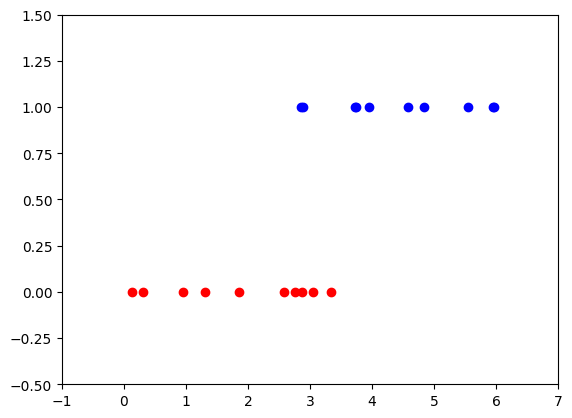

In [307]:
plt.scatter(X_train[:cnt_points, 1, 0], y_train[:cnt_points], c="r",)
plt.scatter(X_train[cnt_points:, 1, 0], y_train[cnt_points:], c="b")
plt.axis([-1, 7, -0.5, 1.5]);

In [301]:
# Logistic Regression

def sigmoid(v):
    return 1 / (1 + np.exp(-v))

# vector cot
w = np.array([10., 10.]).reshape(-1, 1)
esp = 1e-4
weights = []
step_diff = 20

for _ in range(10000):
    i = np.random.randint(X_train.shape[0])
    w = w - (sigmoid(w.T @ X_train[i]) - y_train[i]) * X_train[i]
    weights.append(w)
    
    if len(weights) >= step_diff:
        if np.linalg.norm(w - weights[-step_diff]) <= esp:
            break
            
print(w)

[[-35.85473151]
 [ 10.58918998]]


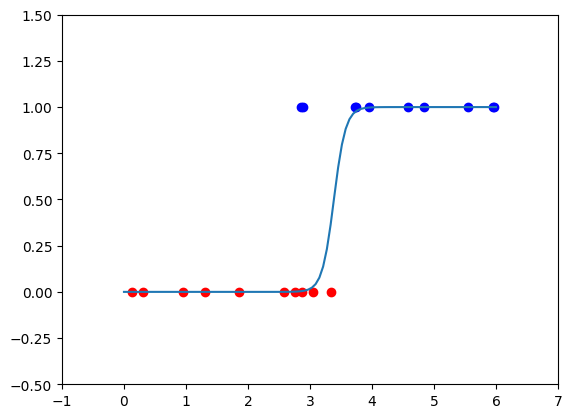

In [308]:
plt.scatter(X_train[:cnt_points, 1, 0], y_train[:cnt_points], c="r",)
plt.scatter(X_train[cnt_points:, 1, 0], y_train[cnt_points:], c="b")
plt.axis([-1, 7, -0.5, 1.5]);

x = np.concatenate((np.ones((100, 1)), np.linspace(0, 6, 100).reshape(-1, 1)), axis=1).reshape(100, -1, 1)
y = np.array([sigmoid(w.T @ x[i]) for i in range(x.shape[0])])

# y -> predicted values:
    # if larger than threshold (0.5) -> class 1
    # else -> class 0

plt.plot(x[:, 1, 0], y[:, :, 0]);